In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Functions

In [5]:
def rolling_average(arr, ROLLING_WINDOW_SIZE):
    cumsum = arr.cumsum()
    cumsum[ROLLING_WINDOW_SIZE:] -= cumsum[:-ROLLING_WINDOW_SIZE]
    return np.array((cumsum[ROLLING_WINDOW_SIZE - 1:] / ROLLING_WINDOW_SIZE))

# Loading Data

In [18]:
sample_size=10
runs=range(1,sample_size+1)

alphas=[0.01,0.05,0.1]
epsdecays = [0.01,0.001,0.0001]
gammas = [0.1,0.5,0.9]

In [83]:
gamma_filepaths = [f"cumulative_rewards/cumulative_rewards_{i}_gamma_{j}.npy" for i in runs for j in gammas]
gamma_cumrewards = [np.load(path) for path in gamma_filepaths]
gamma_cumrewards = np.array(gamma_cumrewards) # contains all the arrays of cumulative rewards

epsdecay_filepaths = [f"cumulative_rewards/cumulative_rewards_{i}_epsdecay_{j}.npy" for i in runs for j in epsdecays]
epsdecay_cumrewards = [np.load(path) for path in epsdecay_filepaths]
epsdecay_cumrewards = np.array(epsdecay_cumrewards)

alpha_filepaths = [f"cumulative_rewards/cumulative_rewards_{i}_alpha_{j}.npy" for i in runs for j in alphas]
alpha_cumrewards = [np.load(path) for path in alpha_filepaths]
alpha_cumrewards = np.array(alpha_cumrewards)

filepaths = [f'cumulative_rewards/cumulative_rewards_{i}.npy' for i in runs]
cumrewards = [np.load(path) for path in filepaths]
cumrewards = np.array(cumrewards)

alpha_cumrewards.shape

(30, 10000)

# Data Manipulation (computing rolling averages)

In [84]:
window_size = 500

alpha_rollavg_cumreward = [rolling_average(rewards,window_size) for rewards in alpha_cumrewards]
alpha_rollavg_cumreward = np.array(alpha_rollavg_cumreward)

epsdecay_rollavg_cumreward = [rolling_average(rewards,window_size) for rewards in epsdecay_cumrewards]
epsdecay_rollavg_cumreward = np.array(epsdecay_rollavg_cumreward)

gamma_rollavg_cumreward = [rolling_average(rewards,window_size) for rewards in gamma_cumrewards]
gamma_rollavg_cumreward = np.array(gamma_rollavg_cumreward)

normal_rollavg_cumreward = [rolling_average(rewards,window_size) for rewards in cumrewards]
normal_rollavg_cumreward = np.array(normal_rollavg_cumreward)

# Plotting

In [85]:
window_size = 500

alpha_rollavg_cumreward = [rolling_average(rewards,window_size) for rewards in alpha_cumrewards]
alpha_rollavg_cumreward = np.array(alpha_rollavg_cumreward)

epsdecay_rollavg_cumreward = [rolling_average(rewards,window_size) for rewards in epsdecay_cumrewards]
epsdecay_rollavg_cumreward = np.array(epsdecay_rollavg_cumreward)

gamma_rollavg_cumreward = [rolling_average(rewards,window_size) for rewards in gamma_cumrewards]
gamma_rollavg_cumreward = np.array(gamma_rollavg_cumreward)

normal_rollavg_cumreward = [rolling_average(rewards,window_size) for rewards in cumrewards]
normal_rollavg_cumreward = np.array(normal_rollavg_cumreward)

no_of_epochs = gamma_rollavg_cumreward.shape[1]
epochs = np.arange(no_of_epochs)

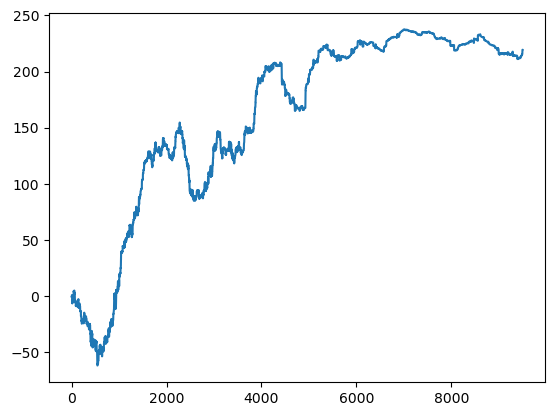

In [87]:
plt.plot(epochs,normal_rollavg_cumreward.mean(axis=0))


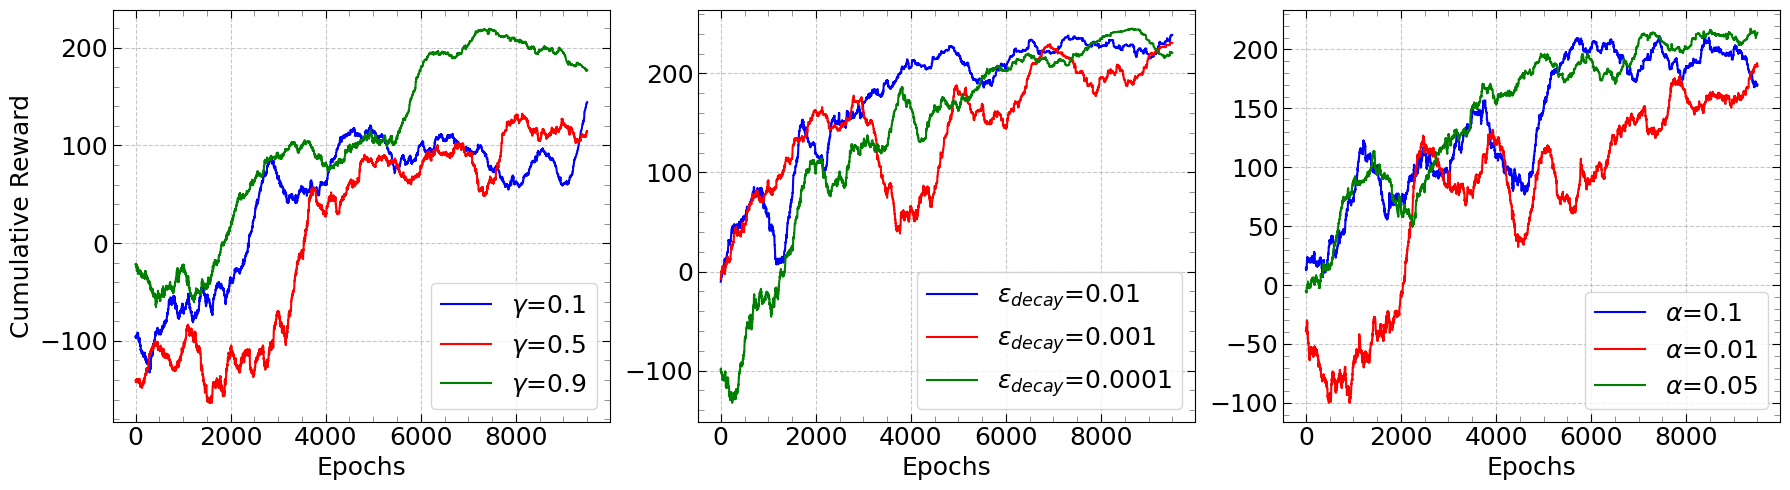

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Plot for Gamma
ax[0].plot(epochs, gamma_rollavg_cumreward[0:10].mean(axis=0), label=r'$\gamma$=0.1', color='blue')
ax[0].plot(epochs, gamma_rollavg_cumreward[10:20].mean(axis=0), label=r'$\gamma$=0.5', color='red')
ax[0].plot(epochs, gamma_rollavg_cumreward[20:30].mean(axis=0), label=r'$\gamma$=0.9', color='green')

ax[0].set_xlabel('Epochs', fontsize=18)
ax[0].set_ylabel('Cumulative Reward', fontsize=18)
ax[0].tick_params(axis='x', labelsize=18)
ax[0].tick_params(axis='y', labelsize=18)
ax[0].grid(True, linestyle='--', alpha=0.7)
ax[0].legend(fontsize=18, loc='lower right')
ax[0].minorticks_on()
ax[0].tick_params(axis='both', which='minor', length=4, color='gray', labelsize=18)
ax[0].tick_params(axis='both', which='major', length=6, color='black', labelsize=18)
ax[0].tick_params(top=True, right=True, direction='in', length=6)
ax[0].tick_params(which='minor', top=True, right=True, direction='in', length=4)
ax[0].legend(fontsize=18, loc='lower right')

# Plot for Epsilon Decay
ax[1].plot(epochs, epsdecay_rollavg_cumreward[0:10].mean(axis=0), label=r'$\epsilon_{decay}$=0.01', color='blue')
ax[1].plot(epochs, epsdecay_rollavg_cumreward[10:20].mean(axis=0), label=r'$\epsilon_{decay}$=0.001', color='red')
ax[1].plot(epochs, epsdecay_rollavg_cumreward[20:30].mean(axis=0), label=r'$\epsilon_{decay}$=0.0001', color='green')

ax[1].set_xlabel('Epochs', fontsize=18)
ax[1].tick_params(axis='x', labelsize=18)
ax[1].tick_params(axis='y', labelsize=18)
ax[1].grid(True, linestyle='--', alpha=0.7)
ax[1].legend(fontsize=18, loc='lower right')
ax[1].minorticks_on()
ax[1].tick_params(axis='both', which='minor', length=4, color='gray', labelsize=18)
ax[1].tick_params(axis='both', which='major', length=6, color='black', labelsize=18)
ax[1].tick_params(top=True, right=True, direction='in', length=6)
ax[1].tick_params(which='minor', top=True, right=True, direction='in', length=4)
ax[1].legend(fontsize=18, loc='lower right')

# Plot for Alpha
ax[2].plot(epochs, alpha_rollavg_cumreward[0:10].mean(axis=0), label=rf'$\alpha$=0.1', color='blue')
ax[2].plot(epochs, alpha_rollavg_cumreward[10:20].mean(axis=0), label=rf'$\alpha$=0.01', color='red')
ax[2].plot(epochs, alpha_rollavg_cumreward[20:30].mean(axis=0), label=rf'$\alpha$=0.05', color='green')

ax[2].set_xlabel('Epochs', fontsize=18)
ax[2].tick_params(axis='x', labelsize=18)
ax[2].tick_params(axis='y', labelsize=18)
ax[2].grid(True, linestyle='--', alpha=0.7)
ax[2].legend(fontsize=18, loc='lower right')
ax[2].minorticks_on()
ax[2].tick_params(axis='both', which='minor', length=4, color='gray', labelsize=18)
ax[2].tick_params(axis='both', which='major', length=6, color='black', labelsize=18)
ax[2].tick_params(top=True, right=True, direction='in', length=6)
ax[2].tick_params(which='minor', top=True, right=True, direction='in', length=4)
ax[2].legend(fontsize=18, loc='lower right')

plt.tight_layout()
plt.show()
